In [3]:
import os
os.listdir("/content")

['.config',
 'Kemiskinan_2024.csv',
 'Kemiskinan_2018.csv',
 'Kemiskinan_2017.csv',
 'Kemiskinan_2022.csv',
 'Kemiskinan_2020.csv',
 'Kemiskinan_2015.csv',
 'Kemiskinan_2016.csv',
 'Kemiskinan_2019.csv',
 'Kemiskinan_2021.csv',
 'Kemiskinan_2023.csv',
 '.ipynb_checkpoints',
 'sample_data']

In [4]:
import glob
import os
import pandas as pd

all_files = glob.glob("/content/Kemiskinan_*.csv")
dfs = []

for file in all_files:
    filename = os.path.basename(file)

    tahun = int(filename.replace("Kemiskinan_", "").replace(".csv", ""))

    temp = pd.read_csv(file)

    temp = temp[[
        "Provinsi",
        "Jumlah Penduduk Miskin - Maret (ribu) (Ribu)",
        "Persentase Penduduk Miskin - Maret"
    ]]

    temp.columns = [
        "Provinsi",
        "Jumlah Kemiskinan",
        "Persentase Kemiskinan"
    ]

    temp["Tahun"] = tahun
    dfs.append(temp)

data_kemiskinan = pd.concat(dfs, ignore_index=True)


**DATA CLEANING**

In [5]:
data_kemiskinan.shape

(368, 4)

In [6]:
data_kemiskinan.sample(10)

,Provinsi,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun
257,Sumatera Utara,1282.04,8.83,2019
153,Sumatera Barat,344.23,6.28,2020
186,Aceh,851.59,17.08,2015
81,Lampung,1131.73,13.69,2017
232,Jawa Barat,4224.33,8.95,2016
365,NaN,NaN,NaN,2023
323,Papua Barat,219.07,21.84,2021
177,Sulawesi Selatan,776.83,8.72,2020
135,Sulawesi Selatan,777.44,8.63,2022
360,Papua,915.15,26.03,2023


In [7]:
data_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Provinsi               366 non-null    object
 1   Jumlah Kemiskinan      362 non-null    object
 2   Persentase Kemiskinan  362 non-null    object
 3   Tahun                  368 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


In [8]:
data_kemiskinan.isna().sum()

,0
Provinsi,2
Jumlah Kemiskinan,6
Persentase Kemiskinan,6
Tahun,0


In [9]:
data_kemiskinan["Provinsi"].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'DKI Jakarta',
       'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur',
       'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara',
       'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Maluku Utara',
       'Papua Barat', 'Papua Barat Daya', 'Papua', 'Papua Selatan',
       'Papua Tengah', 'Papua Pegunungan', 'Indonesia', nan, 'Catatan',
       '-', 'September 2023 tidak dilakukan penghitungan kemiskinan'],
      dtype=object)

In [10]:
data_kemiskinan.duplicated().sum()

np.int64(0)

*Ringkasan Kondisi Data*

Terdapat beberapa cacat data pada data_kemiskinan. Tedeteksi bahwa data ini terdapat kecacatan seperti:

1. Salah tipe data pada kolom 'Jumlah Kemiskinan' & 'Persentase Kemiskinan'
2. Terdapat missing values pada kolom 'Provinsi', 'Jumlah Kemiskinan' dan 'Persentase Kemiskinan'
3. Terdapat baris sampah di kolom 'Provinsi'

**FIX DATA**

In [11]:
data_kemiskinan = data_kemiskinan.dropna(subset=["Provinsi"])
data_kemiskinan = data_kemiskinan[
    ~data_kemiskinan["Provinsi"].str.contains(
        "Catatan|tidak dilakukan|-",
        case=False,
        na=False
    )
]

data_kemiskinan.shape

(362, 4)

In [12]:
data_kemiskinan['Provinsi'].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'DKI Jakarta',
       'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur',
       'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara',
       'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Maluku Utara',
       'Papua Barat', 'Papua Barat Daya', 'Papua', 'Papua Selatan',
       'Papua Tengah', 'Papua Pegunungan', 'Indonesia'], dtype=object)

In [13]:
kolom_numerik = ["Jumlah Kemiskinan","Persentase Kemiskinan"]

for a in kolom_numerik:
  data_kemiskinan[a] = pd.to_numeric(data_kemiskinan[a],errors="coerce")


data_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 364
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provinsi               362 non-null    object 
 1   Jumlah Kemiskinan      354 non-null    float64
 2   Persentase Kemiskinan  354 non-null    float64
 3   Tahun                  362 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 14.1+ KB


In [14]:
data_kemiskinan["Jumlah Kemiskinan"] = (
    data_kemiskinan.groupby("Provinsi")["Jumlah Kemiskinan"].
    transform(lambda x: x.fillna(x.median()))

)

data_kemiskinan['Persentase Kemiskinan'] = (
    data_kemiskinan.groupby("Provinsi")["Persentase Kemiskinan"].
    transform(lambda x: x.fillna(x.median()))
)

In [15]:
data_kemiskinan.isna().sum()

,0
Provinsi,0
Jumlah Kemiskinan,0
Persentase Kemiskinan,0
Tahun,0


**EDA (Exploratory Data Analysis)**


**1. Quality Data**

In [16]:
data_kemiskinan.describe()

,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun
count,362.000000,362.000000,362.000000
mean,1478.332099,82.038508,2019.616022
std,4390.319111,1348.853845,2.900772
min,39.690000,3.470000,2015.000000
25%,193.427500,6.427500,2017.000000
50%,365.440000,9.660000,2020.000000
75%,857.260000,14.245000,2022.000000
max,28592.830000,25674.580000,2024.000000


**2. Jumlah Provinsi Per Tahun**

In [17]:
data_kemiskinan.groupby("Tahun")["Provinsi"].nunique()

,Provinsi
Tahun,
2015,35
2016,35
2017,35
2018,35
2019,35
2020,35
2021,35
2022,39
2023,39


**3. Tren Nasional Kemiskinan Dari Tahun ke Tahun**

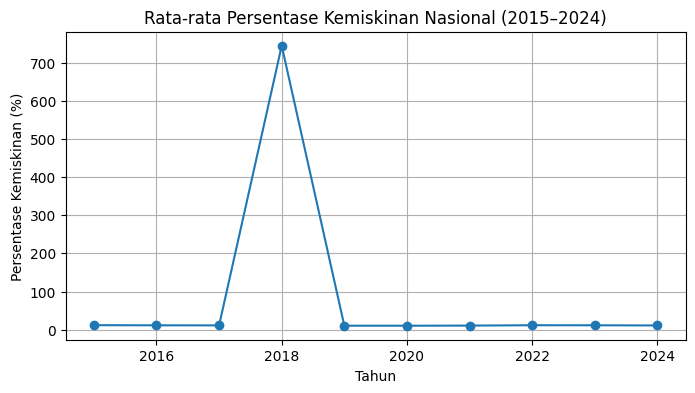

In [18]:
import matplotlib.pyplot as plt

nasional = (
    data_kemiskinan.groupby("Tahun")["Persentase Kemiskinan"].mean()
)

plt.figure(figsize=(8,4))
plt.plot(nasional.index, nasional.values, marker="o")
plt.title("Rata-rata Persentase Kemiskinan Nasional (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("Persentase Kemiskinan (%)")
plt.grid(True)
plt.show()


**5. Provinsi Paling Miskin vs Provinsi Paling Rendah**

In [19]:
Termiskin = (
    data_kemiskinan.groupby("Provinsi")["Persentase Kemiskinan"].mean().
    sort_values(ascending=False).head(5)
)
Termiskin

,Persentase Kemiskinan
Provinsi,
Indonesia,2576.404
Papua Pegunungan,32.970
Papua Tengah,29.760
Papua,26.295
Papua Barat,22.822


In [20]:
Terendah = (
    data_kemiskinan.groupby("Provinsi")["Persentase Kemiskinan"].mean().
    sort_values().head(5)
)

Terendah

,Persentase Kemiskinan
Provinsi,
DKI Jakarta,4.117
Bali,4.217
Kalimantan Selatan,4.576
Kepulauan Bangka Belitung,4.864
Kalimantan Tengah,5.266


**6. Distribusi Kemiskinan(Skew left/Right)**

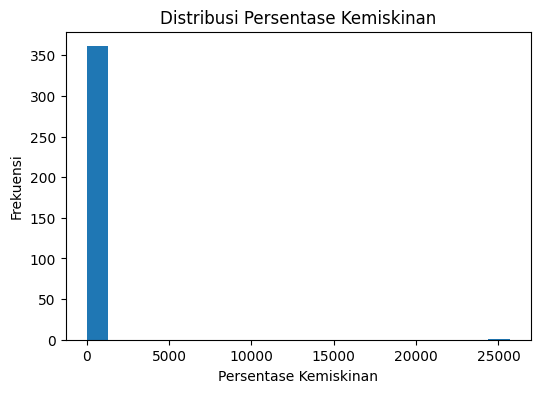

In [21]:
plt.figure(figsize=(6,4))
plt.hist(data_kemiskinan["Persentase Kemiskinan"], bins=20)
plt.title("Distribusi Persentase Kemiskinan")
plt.xlabel("Persentase Kemiskinan")
plt.ylabel("Frekuensi")
plt.show()


**7. Variasi Antar Provinsi**

<Figure size 1200x500 with 0 Axes>

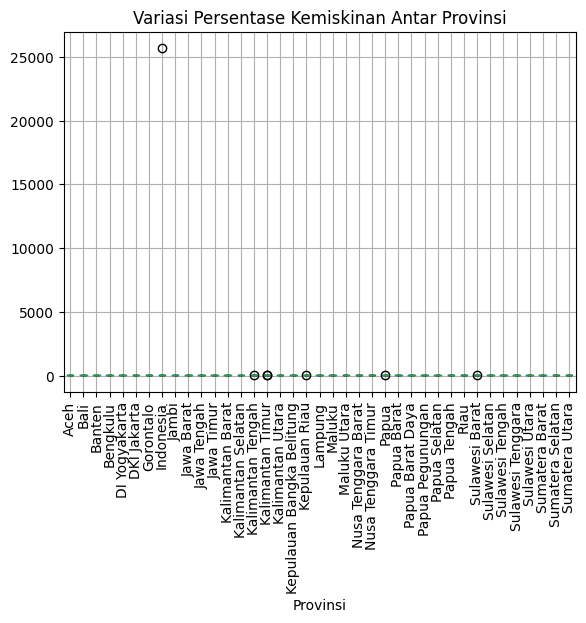

In [22]:
plt.figure(figsize=(12,5))
data_kemiskinan.boxplot(
    column="Persentase Kemiskinan",
    by="Provinsi",
    rot=90
)
plt.title("Variasi Persentase Kemiskinan Antar Provinsi")
plt.suptitle("")
plt.show()


Secara struktural data sudah rapi, tapi EDA menemukan dua masalah utama yaitu:
1. Skala kolom persentase kemiskinan tidak benar
2. Keberadaan baris agregat nasional Indonesia yang harus dihapus

Kedua masalah ini harus diperbaiki sebelum analisis selanjut nya dilakukan

**FIX THAT**

In [23]:
data_kemiskinan = data_kemiskinan[
    data_kemiskinan["Provinsi"] != "Indonesia"
]

In [24]:
data_kemiskinan["Persentase Kemiskinan"].describe()

,Persentase Kemiskinan
count,352.000000
mean,11.175852
std,6.149852
min,3.470000
25%,6.327500
50%,9.465000
75%,14.305000
max,32.970000


In [25]:
data_kemiskinan["Persentase Kemiskinan"]\
.sort_values(ascending=False).head(10)


,Persentase Kemiskinan
363,32.97
37,32.97
146,32.97
145,29.76
362,29.76
36,29.76
254,28.54
219,28.17
72,27.74
107,27.62


In [26]:
data_kemiskinan["Persentase Kemiskinan"] = (
    data_kemiskinan["Persentase Kemiskinan"] / 100
)


In [27]:
data_kemiskinan["Persentase Kemiskinan"].describe()


,Persentase Kemiskinan
count,352.000000
mean,0.111759
std,0.061499
min,0.034700
25%,0.063275
50%,0.094650
75%,0.143050
max,0.329700


In [28]:
data_kemiskinan[
    (data_kemiskinan["Persentase Kemiskinan"] < 0) |
    (data_kemiskinan["Persentase Kemiskinan"] > 100)
]


,Provinsi,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun


In [29]:
data_kemiskinan.groupby("Tahun")["Provinsi"].nunique()


,Provinsi
Tahun,
2015,34
2016,34
2017,34
2018,34
2019,34
2020,34
2021,34
2022,38
2023,38


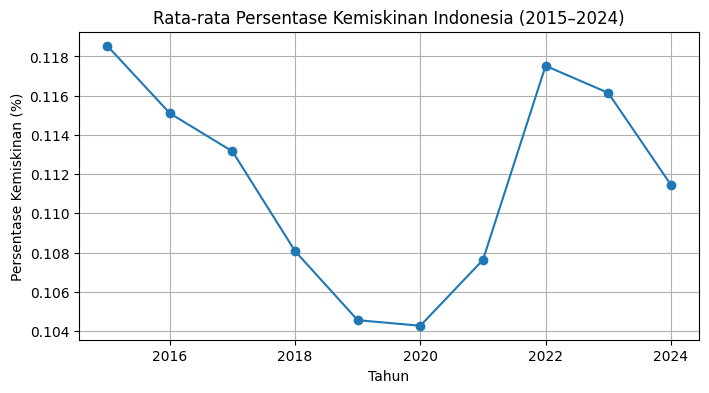

In [30]:
nasional = data_kemiskinan.groupby("Tahun")["Persentase Kemiskinan"].mean()

plt.figure(figsize=(8,4))
plt.plot(nasional.index, nasional.values, marker="o")
plt.title("Rata-rata Persentase Kemiskinan Indonesia (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("Persentase Kemiskinan (%)")
plt.grid(True)
plt.show()


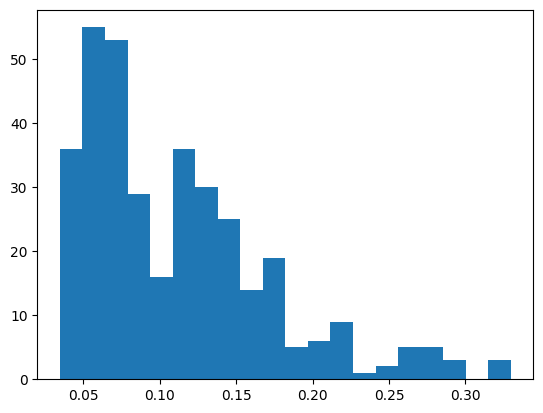

In [31]:
plt.hist(data_kemiskinan["Persentase Kemiskinan"], bins=20)
plt.show()


**KESIMPULAN EDA**

Berdasarkan hasil Exploratory Data Analysis (EDA), data kemiskinan Indonesia dari tahun 2015 - 2024 telah dilakukan data cleaning dan validasi. Baris ("Indonesia") yang bukan provinsi telah dihapus dan skala variabel Persentase Kemiskinan telah diubah.

Hasil validasi menunjukan sudah tidak terdapat nilai persentase kemiskinan di luar rentang logis (0 - 100). Distribusi data menunjukan pola skew ke kanan, dengan mayoritas provinsi berada di kisaran 5 - 15 % . Tren rata rata Indonesia juga menunjukan penurunan kemiskinan hingga 2019, peningkatan pada periode pandemi COVID-19(2020 - 2022), dan kembali menurun pada tahun tahun berikutnya.

Perbedaan jumlah provinsi setelah tahun 2022 disebabkan oleh pemekaran wilayah di Provinsi Papua dan bukan merupakan kesalahan data.

**Feature Engineering**

In [32]:
data_kemiskinan.head()

,Provinsi,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun
0,Aceh,804.53,0.1423,2024
1,Sumatera Utara,1228.01,0.0799,2024
2,Sumatera Barat,345.73,0.0597,2024
3,Riau,492.25,0.0667,2024
4,Jambi,265.42,0.0710,2024


Terdapat angka yang sangat besar di jumlah kemiskinan dan angka yang terlalu kecil di persentase kemiskinan maka Feature Engineering dilakukan

In [33]:
import numpy as np

data_kemiskinan['Log Jumlah Kemiskinan'] = np.log1p(
    data_kemiskinan["Jumlah Kemiskinan"]
)

data_kemiskinan[["Jumlah Kemiskinan","Log Jumlah Kemiskinan"]].describe()

,Jumlah Kemiskinan,Log Jumlah Kemiskinan
count,352.000000,352.000000
mean,762.632273,5.996077
std,1091.182515,1.080853
min,39.690000,3.705982
25%,192.202500,5.263738
50%,349.235000,5.858600
75%,816.042500,6.705688
max,4789.120000,8.474311


Feature Trend

--> Mengetahui membaik atau memburuk dari tahun ke tahun

In [34]:
data_kemiskinan = data_kemiskinan.sort_values(
    ['Provinsi','Tahun'])

data_kemiskinan['Perbandingan Persentase'] = (
    data_kemiskinan.groupby('Provinsi')['Persentase Kemiskinan'].diff()
)

data_kemiskinan['Perbandingan Persentase'] = (
    data_kemiskinan["Perbandingan Persentase"].fillna(0)
)

Categorical Variable pada kolom tahun

In [36]:
data_kemiskinan['Kategori Tahun'] = (data_kemiskinan['Tahun'] -
                                     data_kemiskinan['Tahun'].min())

In [35]:
data_kemiskinan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 186 to 1
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Provinsi                 352 non-null    object 
 1   Jumlah Kemiskinan        352 non-null    float64
 2   Persentase Kemiskinan    352 non-null    float64
 3   Tahun                    352 non-null    int64  
 4   Log Jumlah Kemiskinan    352 non-null    float64
 5   Perbandingan Persentase  352 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.2+ KB


In [37]:
data_kemiskinan.head()

,Provinsi,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun,Log Jumlah Kemiskinan,Perbandingan Persentase,Kategori Tahun
186,Aceh,851.59,0.1708,2015,6.748279,0.0000,0
221,Aceh,848.44,0.1673,2016,6.744577,-0.0035,1
74,Aceh,872.61,0.1689,2017,6.772634,0.0016,2
39,Aceh,839.49,0.1597,2018,6.733985,-0.0092,3
256,Aceh,819.44,0.1532,2019,6.709841,-0.0065,4


**KESIMPULAN FEATURE ENGINEERING**

Untuk meningkatkan kualitas analisis, dilakukan beberapa rekayasa fitur penting:

- Log Transform pada jumlah penduduk miskin untuk mengurangi skewness
- FeatureTrend untuk menangkap dinamika perubahan antar tahun
- Categorical tahun untuk representasi yang lebih stabil

**MODELING**

In [38]:
train = data_kemiskinan[data_kemiskinan["Tahun"] <= 2022]
val = data_kemiskinan[data_kemiskinan["Tahun"] > 2022]

X_Train = train[["Log Jumlah Kemiskinan","Perbandingan Persentase", "Kategori Tahun"]]
X_Val = val[["Log Jumlah Kemiskinan","Perbandingan Persentase","Kategori Tahun"]]
Y_Train = train["Persentase Kemiskinan"]
Y_Val = val["Persentase Kemiskinan"]

X_Train.shape, Y_Val.shape

((276, 3), (76,))

In [39]:
from sklearn.ensemble import RandomForestRegressor

model_utama = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42
)

model_utama.fit(X_Train, Y_Train)


RandomForestRegressor(max_depth=8, n_estimators=300, random_state=42)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred_rf = model_utama.predict(X_Val)

r2_rf = r2_score(Y_Val, y_pred_rf)
mae_rf = mean_absolute_error(Y_Val, y_pred_rf)

print("Random Forest R2 :", r2_rf)
print("Random Forest MAE:", mae_rf)


Random Forest R2 : 0.45081988876955426
Random Forest MAE: 0.03998930729812439


In [41]:
import pandas as pd

feat_imp = pd.DataFrame({
    "Fitur": X_Train.columns,
    "Important": model_utama.feature_importances_
}).sort_values(by="Important", ascending=False)

feat_imp


,Fitur,Important
0,Log Jumlah Kemiskinan,0.742029
1,Perbandingan Persentase,0.186262
2,Kategori Tahun,0.071709


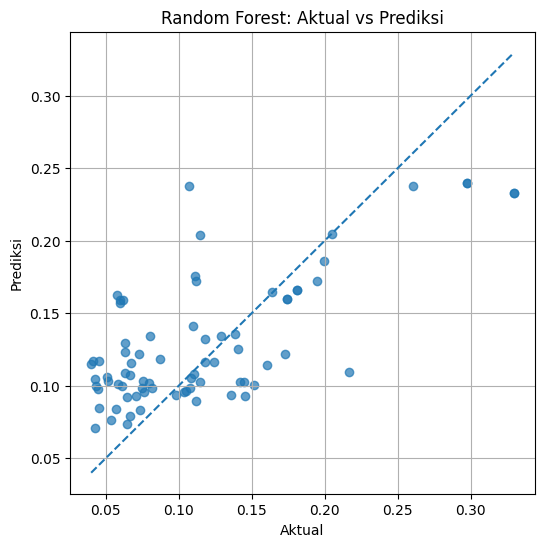

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y_Val, y_pred_rf, alpha=0.7)
plt.plot([Y_Val.min(), Y_Val.max()],
         [Y_Val.min(), Y_Val.max()],
         linestyle="--")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Random Forest: Aktual vs Prediksi")
plt.grid(True)
plt.show()


**KESIMPULAN MODEL**

Random Forest Regression was selected as the final model due to its ability to capture non linear relationships in social economic data. Further hyperparameter tuning and advanced validation techniques were explored; however, given the panel nature of the data and the presence of unobserved social factors, the baseline Random Forest model provided the most stable and interpretable performance.

Meskipun Random Forest mampu menangkap hubungan non-linear, performa model masih terbatas (R² moderat) karena kemiskinan merupakan fenomena sosial kompleks yang dipengaruhi oleh banyak faktor eksternal seperti kebijakan, kondisi ekonomi makro, dan faktor sosial lain yang tidak tersedia dalam dataset. Oleh karena itu, hasil model lebih ditekankan sebagai analisis pola dan tren, bukan prediksi absolut.



**CLUSTERING**

In [48]:
provinsi = (
    data_kemiskinan.groupby('Provinsi').agg({
        "Persentase Kemiskinan": ["mean","std","max"],
        "Jumlah Kemiskinan" : ["mean"],
        "Perbandingan Persentase" : ["mean"]
    }))

provinsi.columns = [
    "AVG Kemiskinan",
    "STD Kemiskinan",
    "MAX Kemiskinan",
    "AVG Populasi Kemiskinan",
    "AVG Perubahan"

]

provinsi = provinsi.reset_index()
provinsi.head()




,Provinsi,AVG Kemiskinan,STD Kemiskinan,MAX Kemiskinan,AVG Populasi Kemiskinan,AVG Perubahan
0,Aceh,0.15563,0.010488,0.1708,829.882,-0.00285
1,Bali,0.04217,0.003270,0.0474,184.169,-0.00074
2,Banten,0.05785,0.004847,0.0666,742.635,-0.00006
3,Bengkulu,0.15478,0.013712,0.1788,305.940,-0.00432
4,DI Yogyakarta,0.12339,0.012341,0.1491,477.322,-0.00408


In [49]:
from sklearn.preprocessing import StandardScaler

Fitur = provinsi.drop(columns=['Provinsi'])
scaler = StandardScaler()
X_Scaler = scaler.fit_transform(Fitur)

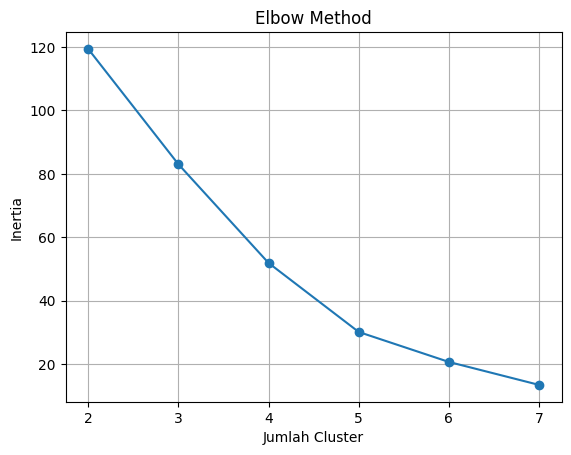

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range (2,8):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(X_Scaler)
  inertia.append(km.inertia_)


plt.plot(range(2,8),inertia,marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
provinsi["Cluster"] = kmeans.fit_predict(X_Scaler)

provinsi[["Provinsi","Cluster"]].head()

,Provinsi,Cluster
0,Aceh,1
1,Bali,0
2,Banten,0
3,Bengkulu,1
4,DI Yogyakarta,1


In [58]:
provinsi.groupby("Cluster")[
    [
        "AVG Kemiskinan",
        "STD Kemiskinan",
        "MAX Kemiskinan",
        "AVG Populasi Kemiskinan",
        "AVG Perubahan"
    ]
].mean()


,AVG Kemiskinan,STD Kemiskinan,MAX Kemiskinan,AVG Populasi Kemiskinan,AVG Perubahan
Cluster,,,,,
0,0.079904,0.004097,0.086452,321.069619,-0.000924
1,0.188226,0.012101,0.205543,591.725286,-0.003620
2,0.102947,0.009259,0.118167,4141.971000,-0.002577


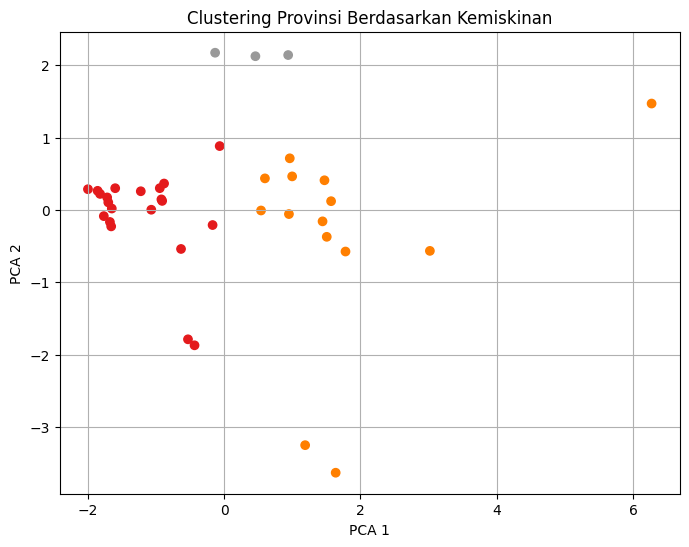

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_Scaler)


plt.figure(figsize=(8,6))
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=provinsi["Cluster"], cmap="Set1")
plt.title("Clustering Provinsi Berdasarkan Kemiskinan")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

**KESIMPULAN CLUSTERING**

Clustering digunakan bertujuan untuk profiling wilayah, dengan melakukan agresi data per provinsi dan menerapkan K-Means (K=3)
diperoleh tiga kelompok,yaitu:

- Cluster 0 : Kemiskinan rendah dan stabil(AVG Kemiskinan = 0.0799)
- Cluster 1 : Kemiskinan tinggi (AVG Kemiskinan = 0.1882)
- Cluster 2 : Kemiskinan sedang (AVG Kemiskinan = 0.1029)



**MAPPING**

In [60]:
import geopandas as gpd

map_indo = gpd.read_file("indonesia-province.json")
map_indo.head()

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((137.91666 -1.49852, 137.8926 -..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((117.6272 -8.5064, 117.6263 -8...."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((122.18814 1.0453, 122.18883 1...."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON ((110.01183 -7.8869, 110.0133 -7.88587..."


In [62]:
map_indo = map_indo.rename(columns={
    "Propinsi": "Provinsi"
})


In [63]:
map_indo.Provinsi.unique()

array(['IRIAN JAYA TIMUR', 'NUSATENGGARA BARAT', 'GORONTALO',
       'SULAWESI TENGGARA', 'DAERAH ISTIMEWA YOGYAKARTA', 'JAWA TENGAH',
       'PROBANTEN', 'JAWA TIMUR', 'MALUKU UTARA', 'MALUKU',
       'KALIMANTAN SELATAN', 'KALIMANTAN BARAT', 'SULAWESI SELATAN',
       'DKI JAKARTA', 'JAWA BARAT', 'IRIAN JAYA TENGAH',
       'NUSA TENGGARA TIMUR', 'BALI', 'RIAU', 'SULAWESI TENGAH',
       'KALIMANTAN TIMUR', 'SULAWESI UTARA', 'IRIAN JAYA BARAT',
       'SUMATERA UTARA', 'BANGKA BELITUNG', 'SUMATERA BARAT',
       'KALIMANTAN TENGAH', 'SUMATERA SELATAN', 'JAMBI', 'LAMPUNG',
       'BENGKULU', 'DI. ACEH'], dtype=object)

In [68]:
map_indo["Provinsi"] = (
    map_indo["Provinsi"]
    .str.replace("IRIAN JAYA TIMUR", "PAPUA")
    .str.replace("IRIAN JAYA TENGAH", "PAPUA TENGAH")
    .str.replace("IRIAN JAYA BARAT", "PAPUA BARAT")

    .str.replace("DAERAH ISTIMEWA YOGYAKARTA", "DI YOGYAKARTA")
    .str.replace("DI. ACEH", "ACEH")

    .str.replace("NUSATENGGARA BARAT", "NUSA TENGGARA BARAT")
    .str.replace("NUSA TENGGARA TIMUR", "NUSA TENGGARA TIMUR")

    .str.replace("PROBANTEN", "BANTEN")
    .str.replace("BANGKA BELITUNG", "KEPULAUAN BANGKA BELITUNG")
)



In [69]:
map_indo["Provinsi"] = map_indo["Provinsi"].str.upper()
provinsi["Provinsi"] = provinsi["Provinsi"].str.upper()


In [70]:
map_cluster = map_indo.merge(
    provinsi,
    on="Provinsi",
    how="left"
)


In [71]:
map_cluster[map_cluster["Cluster"].isna()]["Provinsi"]



,Provinsi


<Figure size 1000x1200 with 0 Axes>

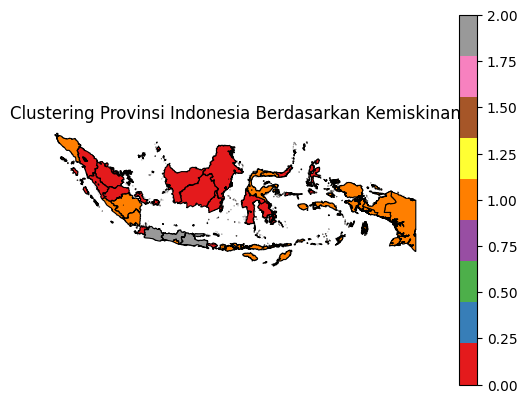

In [75]:
plt.figure(figsize=(10,12))
map_cluster.plot(
    column="Cluster",
    cmap="Set1",
    linewidth=0.8,
    edgecolor="black",
    legend=True
)
plt.title("Clustering Provinsi Indonesia Berdasarkan Kemiskinan")
plt.axis("off")
plt.show()


**KESIMPULAN MAPPING**

Hasil pemetaan clustering menunjukan bahwa kemiskinan di Indonesia memiliki pola religional yang tidak hanya ditentukan oleh persentase penduduk miskin, tetapi juga oleh skala populasi. Wilayah pulau Jawa, meskipun mempunyai persentase kemiskinan relatif rendah, tergolong dalam cluster dengan beban kemiskinan besar secara keseluruhan akibat jumlah penduduk yang tinggi. Sebaliknya, beberapa provinsi di wilayah Indonesia Timur  membentuk cluster dengan tingkat kemiskinan tinggi secara persentase, meskipun skala populasinya lebih kecil. Temuan ini menegaskan bahwa kemiskinan di Indonesia bersifat multidimensional dan tidak bisa dianalisis hanya berdasarkan satu faktor saja. Oleh karena itu, kebijakan penanggulangan kemiskinan perlu mempertimbangkan baik tingkat (persentase) maupun skala (Jumlah) kemiskinan, serta memperhatikan karakteristik regional masing masing wilayah. dan terakhir clustering ini dilakukan untuk memahami pola struktural antar wilayah, bukan untuk memberi penilaian baik atau buruk terhadap suatu provinsi